In [38]:
#Bazi Mathangeni
#22/09/2024

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

myRawData = pd.read_csv("../input_data/Almond.csv")

myRawData.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [39]:
myCleanData = myRawData.dropna(subset = ["Area", "Perimeter", "Roundness", "Solidity", "Compactness", "Aspect Ratio", "Eccentricity", "Extent", "Convex hull(convex area)", "Type"])

myCleanData.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
16,16,315.512085,169.067093,NaN,38551.5,831.085347,0.493082,0.983494,1.425739,1.866195,0.844313,0.777060,39198.5,MAMRA
17,17,318.522736,168.491837,NaN,38867.5,829.712764,0.487771,0.980549,1.409480,1.890434,0.848635,0.773575,39638.5,MAMRA
18,18,320.810455,168.278076,NaN,39255.5,834.884337,0.485639,0.982653,1.413000,1.906430,0.851385,0.783778,39948.5,MAMRA
19,19,317.151794,167.854141,NaN,39163.0,838.641696,0.495737,0.982255,1.429115,1.889449,0.848463,0.772141,39870.5,MAMRA
20,20,397.007843,188.688644,NaN,55550.0,1025.837653,0.448741,0.974989,1.507521,2.104037,0.879836,0.710458,56975.0,MAMRA


In [40]:
np.random.seed(12)

MAMRA = myCleanData[myCleanData["Type"] == "MAMRA"]
MAMRA = MAMRA.to_numpy()

np.random.shuffle(MAMRA)

MAMRA_TRAINING = MAMRA[ : math.floor(0.8*len(MAMRA))]
MAMRA_TEST = MAMRA[ math.floor(0.8*len(MAMRA)) : ]

In [41]:
SANORA = myCleanData[myCleanData["Type"] == "SANORA"]
SANORA = SANORA.to_numpy()

np.random.shuffle(SANORA)

SANORA_TRAINING = SANORA[ : math.floor(0.8*len(SANORA))]
SANORA_TEST = SANORA[ math.floor(0.8*len(MAMRA)) : ]

In [42]:
REGULAR = myCleanData[myCleanData["Type"] == "REGULAR"]

REGULAR = REGULAR.to_numpy()

np.random.shuffle(REGULAR)

REGULAR_TRAINING = REGULAR[ : math.floor(0.8*len(REGULAR))]
REGULAR_TEST = REGULAR[ math.floor(0.8*len(MAMRA)) : ]

In [43]:
MAMRA_SANORA_TRAINING = np.vstack((MAMRA_TRAINING, SANORA_TRAINING))
FINAL_TRAINING_DATA = np.vstack((MAMRA_SANORA_TRAINING, REGULAR_TRAINING))

np.random.shuffle(FINAL_TRAINING_DATA)

MAMRA_SANORA_TEST = np.vstack((MAMRA_TEST, SANORA_TEST))
FINAL_TEST_DATA = np.vstack((MAMRA_SANORA_TEST, REGULAR_TEST))

np.random.shuffle(FINAL_TEST_DATA)

In [44]:
predictorVariables = FINAL_TRAINING_DATA[ : , :13]
predictorVariables = np.float64(predictorVariables)

dependentVariable = FINAL_TRAINING_DATA[ : ,13: ]

dependentVariable[dependentVariable == "MAMRA"] = np.float64(0)
dependentVariable[dependentVariable == "SANORA"] = np.float64(1)
dependentVariable[dependentVariable == "REGULAR"] = np.float64(2)

In [45]:
testPredictorVariables= FINAL_TEST_DATA[ : , :13]
testPredictorVariables = np.float64(testPredictorVariables)

testDependentVariable = FINAL_TEST_DATA[ : ,13: ]

testDependentVariable[testDependentVariable == "MAMRA"] = np.float64(0)
testDependentVariable[testDependentVariable == "SANORA"] = np.float64(1)
testDependentVariable[testDependentVariable == "REGULAR"] = np.float64(2)

Here I standard my data to have a mean of 0 and variance of 1.

In [46]:
def normalizeAndCleanData(predictorVariables):

    pV_normalized = (predictorVariables - predictorVariables.mean(axis = 0))/(predictorVariables.std(axis = 0))
    pV_normalized[np.isnan(pV_normalized)] = np.float64(0)

    return pV_normalized

pV_normalized = normalizeAndCleanData(predictorVariables)
testPV_normalized = normalizeAndCleanData(testPredictorVariables)

Sigmoid function to compute the sigmoid activation value of inputs incoming into a layer.

In [47]:
def sigmoid(x):
    
    return (1/(1 + np.exp(-x)))

Sigmoid derivative function to compute gradient values during backpropation.

In [48]:
def sigmoidDerivative(x):
    
    return (x*(1-x))

Used (Error Sum Of Squares)/2 as my Error/Loss function, hence the function below compute the derivative of the outermost term of my error function. The product of this function, the above mentioned sigmoid function derivative and the values at the neurons of the layer preceding the output layer forms the overall derivative of the Loss Function with respect to Weights.

In [49]:
def outerTermDerivative(targetVal, estimatedVal):
    
    return (targetVal - estimatedVal)

Used to tranform the values of the models dependent variables from an array of values (1 by n) values of (0 = MAMRA, 1 = SANORA, 2 = REGULAR) to an array (3 by n) values with ([1, 0, 0] = MAMRA, [0, 1, 0] = SANORA and [0, 0, 1] = REGULAR).  

In [50]:
def transform(yVals):

    newArr = np.zeros((yVals.shape[0], 3))

    for i in range(len(yVals)):
        
        if yVals[i] == 0:
            newArr[i][0] += 1
        elif yVals[i] == 1:
            newArr[i][1] += 1
        else:
            newArr[i,2] += 1

    return newArr

My model is designed such that the brightness of the output neurons with respect to an input in predicting the out is expressed as a floating point values, with the most likely correct output yielding the highest values. This function supresses the 2 non maximum values to 0 and increases the maximum value to 1.

In [51]:
def classify(yVals):
    
    for i in range(len(yVals)):
        
        if (np.max(yVals[i]) == yVals[i][0]):
            yVals[i][0] = 1
            yVals[i][1] = 0
            yVals[i][2] = 0
        elif (np.max(yVals[i]) == yVals[i][1]):
            yVals[i][0] = 0
            yVals[i][1] = 1
            yVals[i][2] = 0
        elif (np.max(yVals[i]) == yVals[i][2]):
            yVals[i][0] = 0
            yVals[i][1] = 0
            yVals[i][2] = 1

    return yVals

This is my actual Forward Feed and Backpropagation model. It takes in the input values (xVals), target values as (yVals), input layer and hidden layer weights (w1), hidden layer and output layer weights (w2), learning rate value (learningRate) and number of epochs (numEs).

I have commented what each of lines of code does.

In [52]:
def ModelNetwork1(xVals, yVals, w1, w2, learningRate, numEs):

    for i in range(numEs):

        hiddenLayerParemeters = xVals.dot(w1) #multiplies and sums input layer values with their respective weights in preparation to feed the hidden layer as inputs
        hiddenLayerVals = sigmoid(hiddenLayerParemeters) #applies the sigmoid activation function on the incoming paremeters

        outputLayerParameter = hiddenLayerVals.dot(w2) #multiplies the hidden layer values their respective weights in preparation to feed the output layer as inputs
        outputVal = sigmoid(outputLayerParameter) #applied the sigmoid activation function on the incoming parameters to yield final output layer values

        derivativeOfOuterTerm = outerTermDerivative(yVals, outputVal) #computes the first term of the loss function value
        derivativeOfInnerTerm = sigmoidDerivative(outputVal) #computes the second term of the loss function value

        hidden_OutputLayerErrorTerm = derivativeOfOuterTerm * derivativeOfInnerTerm #this is the product of the 2 terms

        lossFunctionDerivative = hiddenLayerVals.T.dot(hidden_OutputLayerErrorTerm.astype(np.float64)) #this is the product of all 3 terms, yielding the actual loss function derivative value with respect to hidden layer and output layer weights
        w2 += lossFunctionDerivative*learningRate #multiplies the learning rate against the loss function derivative then updates the hidden layer - output layer weights
        
        input_HiddenLayerErrorTerm = hidden_OutputLayerErrorTerm.dot(w2.T) * sigmoidDerivative(hiddenLayerVals) #computes the loss function derivative with respect to input layer - hidden layer weights

        w1 += xVals.T.dot(input_HiddenLayerErrorTerm.astype(np.float64)) * learningRate #multiples the learning rate against the loss function derivative then updates the input layer - hidden layer weights

    return (w1, w2)

In [53]:
def evaluate(xVals, yVals, weightsInput_Hidden, weightsHidden_Output):

    transformedDV = transform(yVals)

    matches = sigmoid(sigmoid(xVals.dot(weightsInput_Hidden)).dot(weightsHidden_Output))

    a = 0
    hits = 0
    classifyVals = classify(matches)

    for val in classifyVals:
        if ((val[0] == transformedDV[a][0]) & (val[1] == transformedDV[a][1]) & (val[2] == transformedDV[a][2])):
            hits += 1
        a += 1

    return ((hits/a)*100)

In [54]:
def trainAndEvaluate(hiddenLayerSize, learningRate, numEpochs):
    
    inputSize = pV_normalized.shape[1]

    outputLayerSize = 3

    np.random.seed(12)

    weightsInput_Hidden = np.random.rand(inputSize, hiddenLayerSize)
    weightsHidden_Output = np.random.rand(hiddenLayerSize, outputLayerSize)

    transformedDV = transform(dependentVariable)

    weightsInput_Hidden, weightsHidden_Output = ModelNetwork1(pV_normalized, transformedDV, weightsInput_Hidden, weightsHidden_Output, learningRate, numEpochs)
    
    return evaluate(testPV_normalized, testDependentVariable, weightsInput_Hidden, weightsHidden_Output)
    

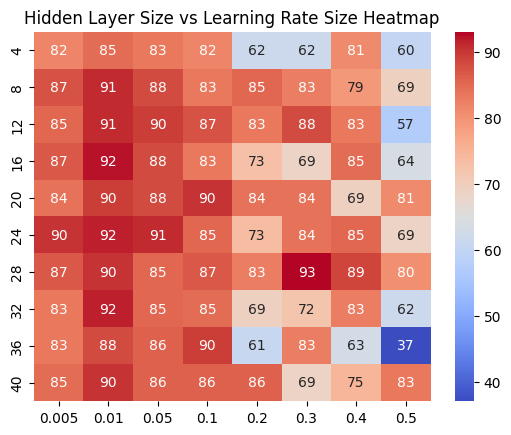

In [55]:
def runGridSearch1():

    hiddenLayerSizes = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
    learningRateSizes = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

    results = []

    maxV = 0
    maxHLayer = 0
    maxLRSize = 0

    for hiddenLayerSize in hiddenLayerSizes:
        tempResults = []
        for learningRateSize in learningRateSizes:
            val = trainAndEvaluate(hiddenLayerSize, learningRateSize, 1000)
            maxV = max(maxV, val)

            if (maxV == val):
                maxHLayer = hiddenLayerSize
                maxLRSize = learningRateSize

            tempResults.append(val)
        results.append(tempResults)
    
    return (np.array(results), maxHLayer, maxLRSize, maxV)

hlSizeVSlrSizeData = runGridSearch1()[0]

xLabels = ["0.005", "0.01", "0.05", "0.1", "0.2", "0.3", "0.4", "0.5"]
yLabels = ["4", "8", "12", "16", "20", "24", "28", "32", "36", "40"]

sns.heatmap(hlSizeVSlrSizeData, annot = True, cmap = "coolwarm", xticklabels = xLabels, yticklabels = yLabels)
plt.title("Hidden Layer Size vs Learning Rate Size Heatmap")
plt.show()

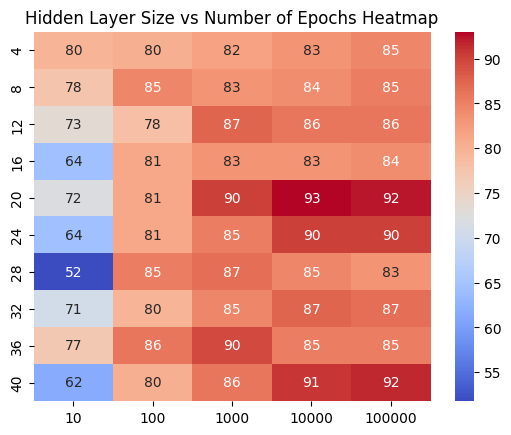

In [56]:
def runGridSearch2():
    
    hiddenLayerSizes = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
    numEpochs = [10, 100, 1000, 10000, 100000]

    results = []

    maxV = 0
    maxHLayer = 0
    maxNumEs = 0


    for hiddenLayerSize in hiddenLayerSizes:
        tempResults = []
        for numEs in numEpochs:
            val = trainAndEvaluate(hiddenLayerSize, 0.1, numEs)
            maxV = max(maxV, val)

            if (maxV == val):
                maxHLayer = hiddenLayerSize
                maxNumEs = numEs
            
            tempResults.append(val)
        results.append(tempResults)

    return (np.array(results), maxHLayer, maxNumEs, maxV)

hlSizeVSnumEsData = runGridSearch2()[0]

xLabels = ["10", "100", "1000", "10000", "100000"]
yLabels = ["4", "8", "12", "16", "20", "24", "28", "32", "36", "40"]

sns.heatmap(hlSizeVSnumEsData, annot = True, cmap = "coolwarm", xticklabels = xLabels, yticklabels = yLabels)
plt.title("Hidden Layer Size vs Number of Epochs Heatmap")
plt.show()

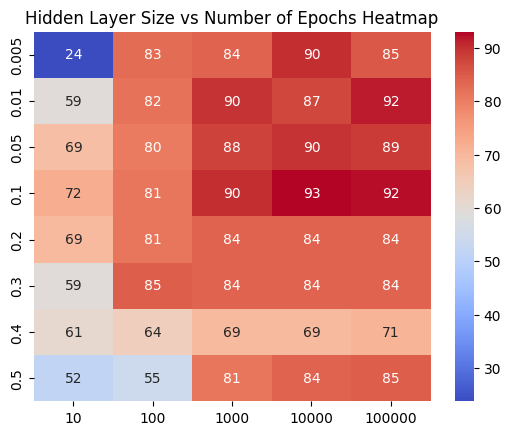

In [57]:
def runGridSearch3():
    
    learningRateSizes = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    numEpochs = [10, 100, 1000, 10000, 100000]

    results = []

    maxV = 0
    maxLRSize = 0
    maxNumEs = 0


    for learningRateSize in learningRateSizes:
        tempResults = []
        for numEs in numEpochs:
            val = trainAndEvaluate(20, learningRateSize, numEs)
            maxV = max(maxV, val)

            if (maxV == val):
                maxLRSize = learningRateSize
                maxNumEs = numEs
            
            tempResults.append(val)
        results.append(tempResults)

    return (np.array(results), maxLRSize, maxNumEs, maxV)

lrSizeVSnumEsData = runGridSearch3()[0]

xLabels = ["10", "100", "1000", "10000", "100000"]
yLabels = ["0.005", "0.01", "0.05", "0.1", "0.2", "0.3", "0.4", "0.5"]

sns.heatmap(lrSizeVSnumEsData, annot = True, cmap = "coolwarm", xticklabels = xLabels,yticklabels = yLabels)
plt.title("Learning Rate Size vs Number of Epochs Heatmap")
plt.show()

In [58]:
def runGridSearchAll():

    hiddenLayerSizes = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
    learningRateSizes = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    numEpochs = [10, 100, 1000, 10000, 100000]

    maxV = 0
    maxHLSize = 0
    maxLRSize = 0
    maxNumEs = 0

    for hiddenLayerSize in hiddenLayerSizes:
        for learningRateSize in learningRateSizes:
            for numEs in numEpochs:
                val = trainAndEvaluate(40, learningRateSize, numEs)
                maxV = max(maxV, val)

                if (maxV == val):
                    maxHLSize = hiddenLayerSize
                    maxLRSize = learningRateSize
                    maxNumEs = numEs

    return (maxHLSize, maxLRSize, maxNumEs, maxV)

#print(runGridSearchAll())